# UNCOVERING THE KEY FACTORS INFLUENCING VIDEO GAME SUCCESS

<a id="0"></a> <br>
 # Table of Contents  
1. [Stage 1: Data Overview](#1)     
1. [Stage 2: Data Preprocessing](#2) 
    1. [Changing column names to lowercase](#3) 
    1. [The 'name'column](#4) 
    1. [The 'year_of_release' column](#5) 
    1. [The 'genre' column](#6) 
    1. [The 'critic_score' column](#7) 
    1. [The 'user_score' column](#8) 
    1. [The 'rating' column](#9) 
    1. [The 'total_sales' column](#10) 
1. [Stage 3: Exploratory Data Analysis](#11)       
    1. [Games Released Throughout The Years](#12)     
    1. [Different total sales from platform to platform.](#13)
    1. [Distribution of total sales for platform which has the greatest total sales ](#31)
    1. [Analyzing Platform Lifecycles: How Quickly New Platforms Emerge and Old Ones Fade](#32)
    1. [Analyzing the trending of video game sales for 2017](#14) 
    1. [Comparing sales of games across potentially profitable platforms](#15)
    1. [The effect of user and professional reviews on sales](#16)
       1. [PS4 Platform](#17)
       1. [XOne Platform](#18)
       1. [3DS Platform](#19)
       1. [Compare the sales of same games in different platform](#20)
    1. [The most profitable genres of 'Games'](#21)
    1. [User Profile for each region](#22)
       1. [North American User](#23)
       1. [Japanese User](#24)
       1. [EU User](#25)
    1. [Conclusion](#26)
1. [Stage 4: Hypothesis Testing](#27) 
    1. [Hypothesis 1:'Average user ratings of the Xbox One and PC platforms are the same.](#28) 
    1. [Hypothesis 2:'Average user ratings for the Action and Sports genres are different.](#29) 
1. [Stage 5: General Conclusion](#30) 

# Introduction <a id='intro'></a>

- At Ice, an online store specializing in global video game sales, access to user and expert reviews, genre classifications, platform data (e.g., Xbox or PlayStation), and historical sales records is available. The objective is to uncover patterns determining a game's success, facilitating the identification of potential blockbuster titles and the planning of targeted advertising campaigns.

> Column description:
> - Name (The title of each video game)
> - Platform (The gaming platform or console on which the game is available)
> - Year_of_Release (The year in which the game was launched)
> - Genre (The category or genre to which the game belong)
> - NA_sales (North American sales in USD million)
> - EU_sales (sales in Europe in USD million)
> - JP_sales (sales in Japan in USD million)
> - Other_sales (sales in other countries in USD million)
> - Critic_score (maximum of 100)
> - User_score (maximum of 10)
> - Rating (ESRB)

## Goals:

- To identify patterns that determine whether a game succeeds or not.
- To identify spot potential big winners for global video game sales and plan advertising campaigns.

<a id="1"></a> 
# Stage 1 : Data Overview 

In [1]:
!pip install missingno

In [2]:
from scipy import stats as st #for probability and calculation of statistics
import pandas as pd #for dataframe manipulation
import numpy as np #for advanced mathematic operation
import matplotlib.pyplot as plt #for plotting and visualize graph
import seaborn as sns
import missingno as msno # visualize missing data in table form
import nltk #for string/text manipulation

In [3]:
# Loading note from the remote Jupyter Hub Notebook
try:
    games = pd.read_csv('/datasets/games.csv')
# If dataset fails to be loaded from the remote Jupyter Hub Notebook
# try loading dataset from my local path
except:
    # Try loading the file locally
    try:
        games = pd.read_csv("/User/deskstop/datasets/games.csv")
    # Run if dataset loading fails
    except Exception as e:
        print(f"Error handling dataset loading: {e}")  

In [4]:
games.info() #info on dataframe
games.head(10) #first 10 rows of games dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Based on the observation on the dataframe, it can be observed that dataframe needs to be fixed:

1. Rename column names to lowercase characters and replace them accordingly.
2. *Name*: The two rows with missing values in the "*Name*" column will be left as it be. 
3. *Year_of_Release*: Convert the "*Year_of_Release*" column from floats to integers. The missing values can be replaced with median based on specific platform instead of global median.
4. *Genre*: Fill the two missing values in the "*Genre*" column with 'Misc'.
5. *Critic_score*: The missing values in the "*Critic_score*" column can be replaced with median. The missing values can be replaced with median based on specific genre instead of global median.
6. *User_score*: Convert "*User_score*" to float and fill missing values.
7. *Rating*: Fill missing values in the "*Rating*" with mode as it cannot be fill based on median and mean.

<AxesSubplot:>

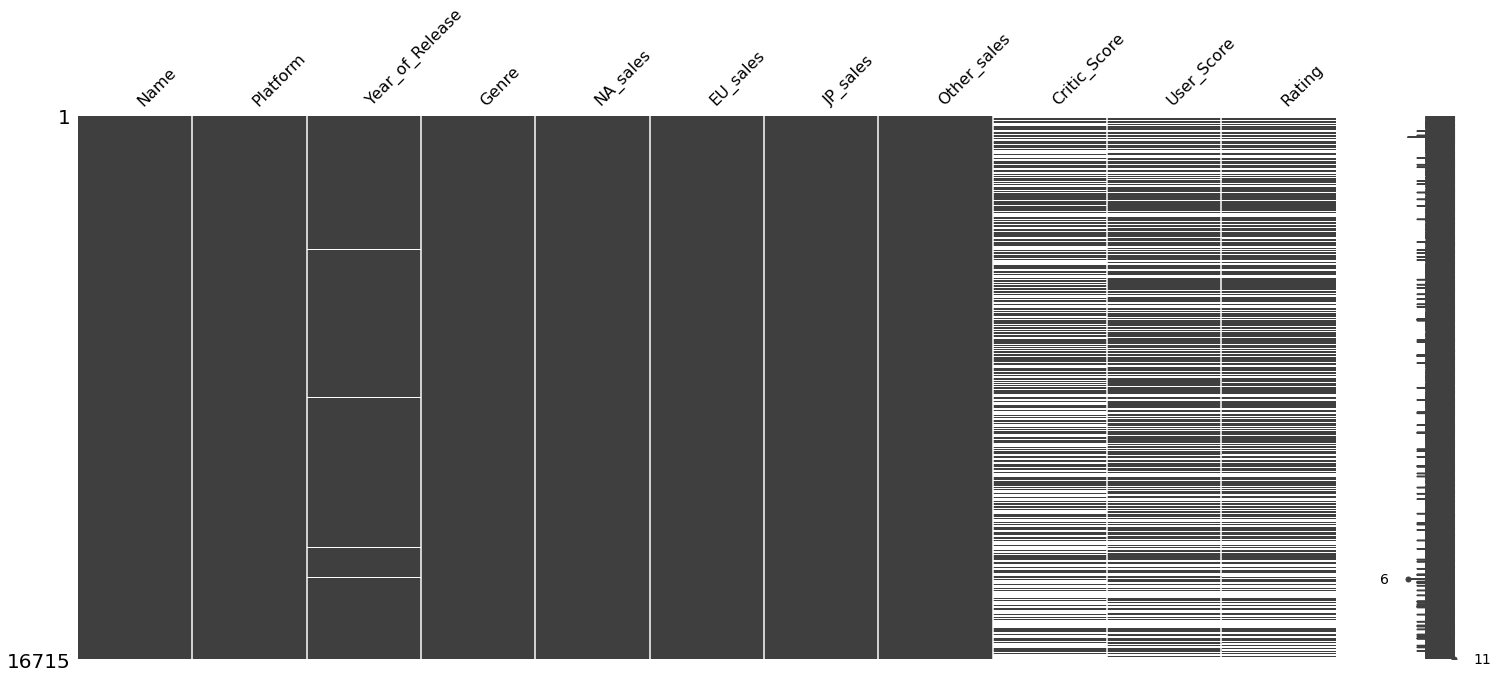

In [5]:
msno.matrix(games) #visualize missing values

<a id="2"></a> 
# Stage 2: Data Preprocessing

<a id="3"></a> 
## Changing Column names to lowercase

In [6]:
games.columns = games.columns.str.lower()
#changes the column names to lowercase and saves the changes

games.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id="4"></a> 
## The 'name' column

- There are only two missing values, which may have been omitted or lost during copying. Since there's no way to fill in the actual names of the games, these entries were dropped.

In [7]:
games['name'].unique() #check all the unique values in the name column

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [8]:
games['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [9]:
# Remove leading and trailing spaces from game names
games['name'] = games['name'].str.strip()

# Sort and print unique game names
unique_game_names = games['name'].sort_values().unique()
unique_game_names

array(["'98 Koshien", '.hack//G.U. Vol.1//Rebirth',
       '.hack//G.U. Vol.2//Reminisce', ..., 'wwe Smackdown vs. Raw 2006',
       '¡Shin Chan Flipa en colores!', nan], dtype=object)

- Based on the result, it can be notice that From the output of games['name'].sort_values().unique(), it seems that some game names have leading spaces, such as ' Beyblade Burst', ' Bimoji Training', ' Bungaku Zenshuu', and so on.

- This leading space in the game names can potentially affect search operations, especially if users are not aware of the leading space. When searching for a game, users may not find the desired game if they don't include the leading space in their search query.

- To address this issue, we can remove leading and trailing spaces from the game names using string manipulation techniques. We can utilize the .str.strip() method in Pandas to remove leading and trailing spaces from each game name before further processing or analysis.

In [10]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- Based on the observation, it would be advisable to remove both row because the genre, user_score, critc_score, rating also at NaN values. In addition, the unknown name cannot be guessed easily, thus it will better to remove it, as it only had two missing row values and not has huge impact on datasets.

In [11]:
games = games.dropna(subset=['name']) # drops two row

<a id="5"></a> 
## The 'year_of_release' column

- Check for missing 'year_of_release' values in dataset
- Change the 'year_of_release' data to int instead of float

In [12]:
games.query('year_of_release.isna()') # check the missing values

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# Count the number of games released in different years
games_per_year = games['year_of_release'].value_counts()

# Sort the index (years) in descending order
games_per_year = games_per_year.sort_index(ascending=False)

# Print the result
print(games_per_year)

2016.0     502
2015.0     606
2014.0     581
2013.0     544
2012.0     653
2011.0    1136
2010.0    1255
2009.0    1426
2008.0    1427
2007.0    1197
2006.0    1006
2005.0     939
2004.0     762
2003.0     775
2002.0     829
2001.0     482
2000.0     350
1999.0     338
1998.0     379
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1992.0      43
1991.0      41
1990.0      16
1989.0      17
1988.0      15
1987.0      16
1986.0      21
1985.0      14
1984.0      14
1983.0      17
1982.0      36
1981.0      46
1980.0       9
Name: year_of_release, dtype: int64


In [14]:
games = games.dropna(subset=['year_of_release']) # remove missing values in year_of_release

- The missing 'year_of_release' column could be dropped. It was dropped because we want an accurate representation of the data for the next analysis. In addition, it can be mentioned that data for every period is significant for next analysis.

In [15]:
games['year_of_release'] = games['year_of_release'].astype('int')
#converts the values of the 'year_of_release' to integers type

games.info()#general info about games dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<a id="6"></a> 
## The 'genre' column

In [16]:
games['genre'] = games['genre'].fillna('Misc')
#fills missing values in the genre column with 'Misc'
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- The missing values had been filled with 'Misc'

In [17]:
games['genre'].unique() #check all the unique values in the genre column
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<a id="7"></a> 
## The 'critic_score' column

- The missing values in the critic_score column need to be replaced with the median score value based on respective genre instead of global median.
- Every missing critic_score value will be filled with the median critic_score value for its genre.
- Check for missing 'critic_score' values in data by making a new function.
- If a missing value is found, it will check its genre, then return the median critic_Score value for the genre from grouped data

In [18]:
critic_score_mapper = games.groupby('genre')['critic_score'].median().to_dict()
#this groups 'games' by genre,then calculates the median critic score

def critic_score_fill(row): #makes a function called critic_score_fill that takes a variable 'row' as argument
    
    if np.isnan(row['critic_score']): #if the critic_score value is missing
        return critic_score_mapper.get(row['genre'])
        #returns the median critic_score value for genre from critic_score_mapper
        
    return row['critic_score'] #returns the existing critic score value if it wasn't missing

games['critic_score'] = games.apply(critic_score_fill, axis=1)
#applies the c_score_fill function to datagames table and saves the results to the critic_score column

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<a id="8"></a> 
## The 'user_score' column

- It can be observed that the data type is object type even though mostly had numbers. This means that it can take text string values also. The data needs to be converted to float as mostly data in the form of 7.8, 8.3,.....

In [19]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
1.9       2
1.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

- It can be observed that there was 'tbd' at large number which is at 2376, where it means that the games are yet to be reviewed.
- Considering that our analysis will involve studying the impact of reviews on sales, treating "tbd" as equivalent to no review seems appropriate. Thus, we will replace all instances of "tbd" with NaN values. 

In [20]:
games['user_score'] = games['user_score'].replace({'tbd' : np.nan})
#replaces every 'tbd' value in the user_score column to NaN (missing values)

games['user_score'] = games['user_score'].astype('float')
#converts the data in the user_score column to float type

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


- The remaining missing values in the user_score will be filled with mean

In [21]:
games['user_score'] = games['user_score'].fillna(games['user_score'].mean())
#replaces the missing values in the user_score with the mean value of user_score column

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<a id="9"></a> 
## The 'rating' column

In [22]:
games['rating'].unique() #displays unique values for the rating column

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- This is categorical column. So, the missing values cannot be replaced with the values of mean or median. What can be used is mode.
- We'll group the games dataframe by genre and determine the most prevalent rating for each genre. Then, we'll convert the resulting dataframe into a dictionary.
- After that, a function can be made where it checks for rows with missing values in the rating column, checks their genre and returns the most popular rating for that genre.
- That function then can be applied to the games table and results saved.

In [23]:
rating_mapper = games.groupby('genre')['rating'].agg(pd.Series.mode).to_dict()
#grouping the games dataframe by the genre and takes the most popular rating for each genre 

def rating_fill(row):#creates a function called rating_fill that takes the row as argument
    
    if pd.isna(row['rating']): #if the rating value is missing
        return rating_mapper.get(row['genre'])
        #returns the most popular rating for its genre from the rating_mapper dictionary
        
    return row['rating']#returns the rating if the value already exists

games['rating'] = games.apply(rating_fill, axis=1)
#applies the rating_fill function to games table and stores the results in the rating column

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<a id="10"></a> 
## The 'total_sales' column

In [24]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [25]:
games[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1) # to add multiple columns

games[[col for col in games.columns if "sales" in col]].sum(axis=1)

0        165.08
1         80.48
2         71.04
3         65.54
4         62.76
          ...  
16710      0.02
16711      0.02
16712      0.02
16713      0.02
16714      0.02
Length: 16444, dtype: float64

<AxesSubplot:>

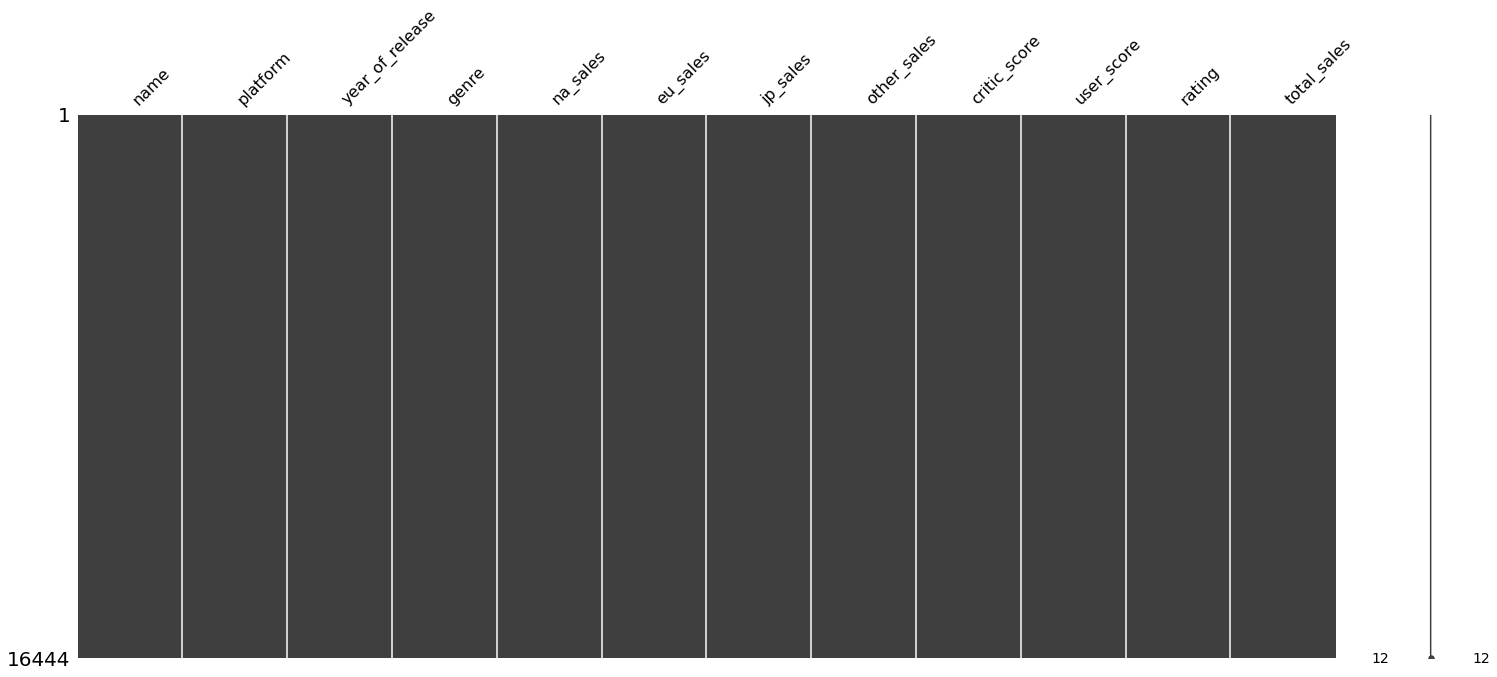

In [26]:
msno.matrix(games) #visualize missing values

CONCLUSION

- We already finished fill up the missing values for each column with reasonable reasons.
- Missing values in the genre, critic_score, user_score, and rating columns had been filled. As for year_of_release, the missing values were removed. A new column of total_sales had been added

<a id="11"></a> 
# Stage 3: Exploratory Data Analysis

This section will be divided to several parts. This is the point for this section:

- Game Released Throughout The Years
- Platform sales duration
- Comparing sales of games across potentially profitable platforms
- The effect of user and professional reviews on sales
- The most profitable genres of 'Games'
- User profile for each region

<a id="12"></a> 
## Games Released Throughout The Years

- The number of games released for each year was count. Then, it will be visualize by bar chart

In [27]:
year_count=games.groupby('year_of_release')['name'].count()
#makes a table called year count which groups the games table by year_of_release and gets a count of the
#game names for each year

year_count

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

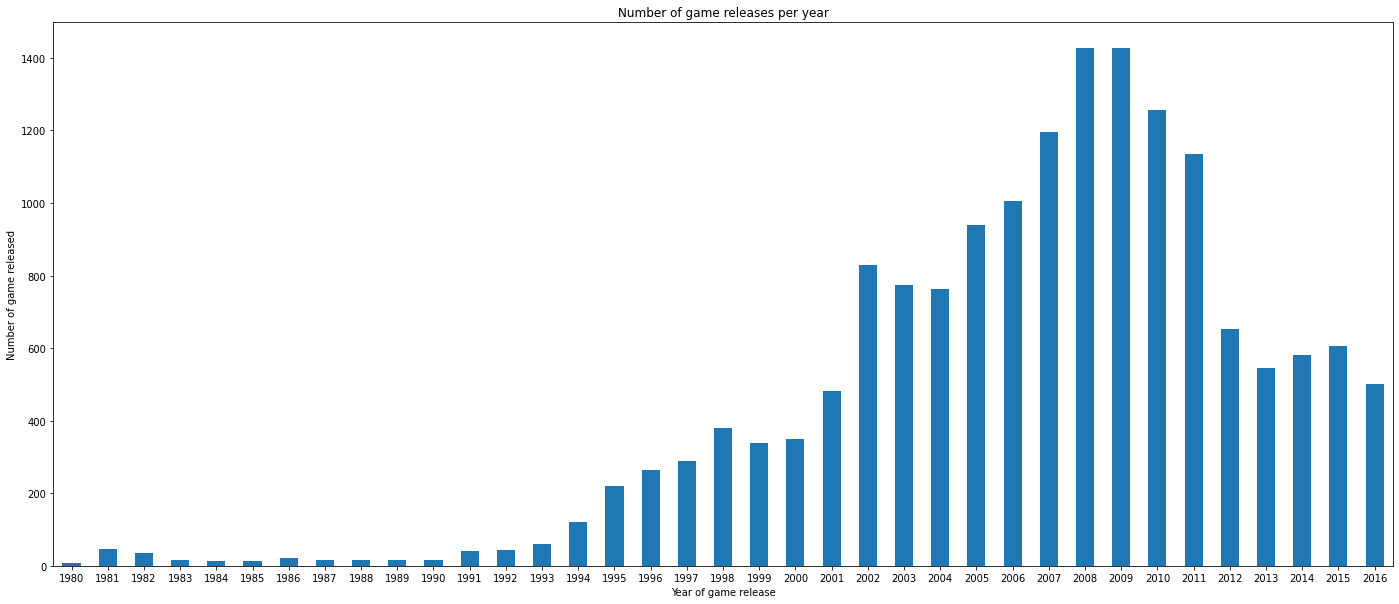

In [28]:
year_count.plot.bar(rot=0, figsize=(24, 10))
plt.title('Number of game releases per year')
plt.xlabel('Year of game release')
plt.ylabel('Number of game released')
plt.show()

#plots a bar chart for year_count table that shows the years and how many games each year had

- Between 1980 and 1994, the number of video game releases per year remained below 200. However, starting from 1995, the popularity of video games began to rise. By 2001, there were approximately 500 releases, and in 2002, this number sharply increased to over 800. The years 2007 to 2011 marked the peak in releases, with 2008 recording the highest number at 1427 releases. It's worth noting that not all periods are equally significant in terms of release volume.

<a id="13"></a> 
## Different total sales from platform to platform.

- The all total sales for all platform will be ranked.

In [29]:
platform_rank = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#groups the games table by platform and finds the sum of the total sales for each platform in descending order

top_platforms=platform_rank.head()
#takes the first 5 rows of the platform ranking table

top_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

- PS2 is the top-selling platform with sales exceeding 1 billion, followed by Xbox 360, PS3, Wii, and Nintendo DS.

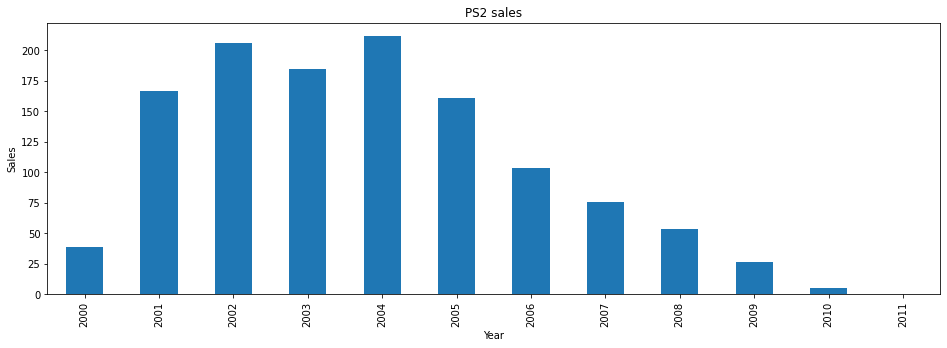

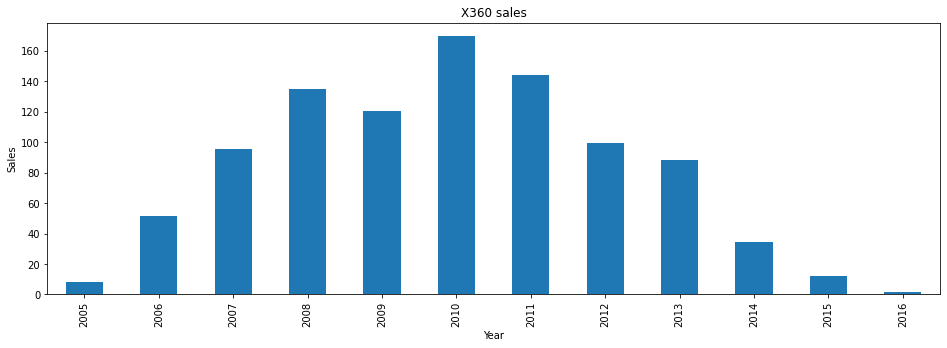

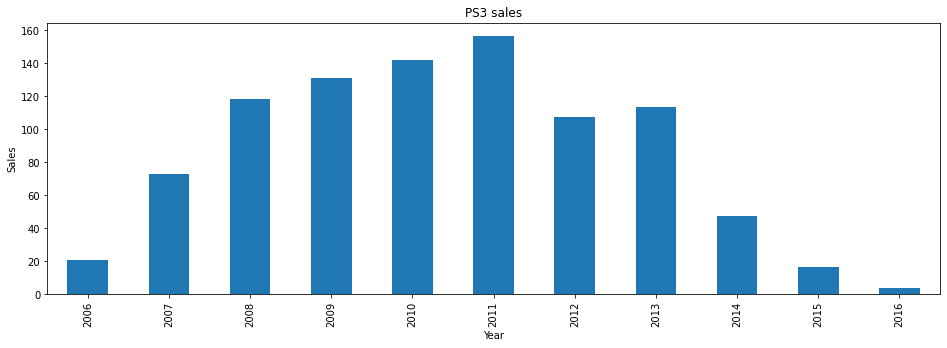

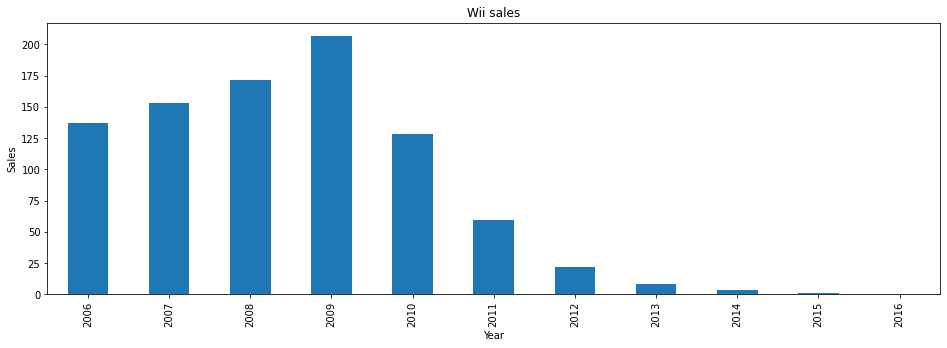

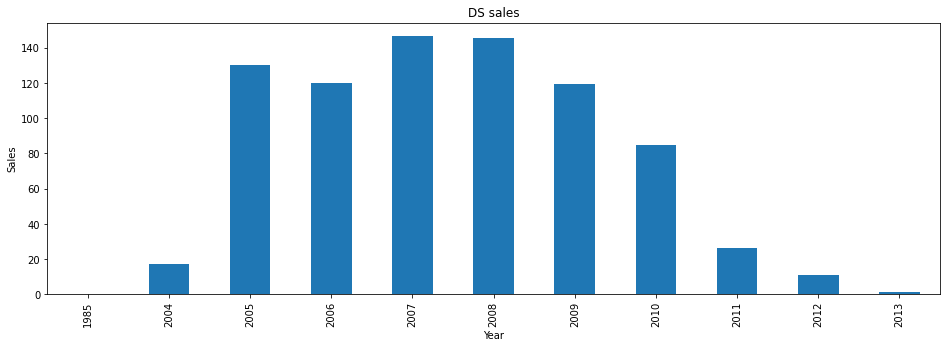

In [30]:
for platform in top_platforms.index: # loops through the top 5 platforms
    
    platform_slice=games.query('platform == @platform')
    # makes a slice of rows from the games table where the value of the platform equals the top 5 platform
    
    platform_slice.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(16, 5))
    # groups the slice by 'year of release' and obtained the sum of the total sales for each year and plots bar chart
    
    plt.title('{} sales'.format(platform)) #titles the chart with the format of ''<platform> sales'
    plt.xlabel('Year') # labeling the x-axis as 'year'
    plt.ylabel('Sales') # labeling the y-axis as 'sales'
    plt.show() # display the chart
    print('')# prints an empty line

From the bar graph, it can be deduced that:

- PS2 was introduced in 2000 and experienced a surge in sales, reaching its peak in popularity in 2004. Subsequently, sales declined, with zero sales recorded after 2010.

- PS3 was launched in 2006, coinciding with the decline of PS2's sales.

- Wii entered the market in 2006 and reached its peak in 2009, followed by a decline, with zero sales reported after 2015.

- DS was introduced in 2004 and enjoyed significant popularity in 2007 and 2008. However, sales declined afterward, with zero sales recorded after 2013.

- On average, it takes 6 to 7 years for new consoles to appear on the market and 9 to 10 years for a platform to completely phase out.

- Our relevant data begins from the year 2006 to mirror a platform's lifespan timeline.

<a id="31"></a> 
## Distribution of total sales for platform which has the greatest total sales 

- First of all, PS2 used to be had highest total sales, means that it was popular. PS2 will be used and check if it still have sales in the most recent year or not.

In [31]:
top_platform_game = platform_rank.idxmax() # Identify the platform with the greatest total sales
top_platform_game

'PS2'

In [32]:
# Filter data for the top platform
top_platform_data = games[games['platform'] == top_platform_game]

In [33]:
# Check if the platform has zero sales in the most recent year
most_recent_year = games['year_of_release'].max()
recent_sales = top_platform_data[top_platform_data['year_of_release'] == most_recent_year]['total_sales'].sum()

In [34]:
if recent_sales == 0:
    print(f"The platform {top_platform_game} used to be popular but now has zero sales in the most recent year.")
else:
    print(f"The platform {top_platform_game} still has sales in the most recent year.")

The platform PS2 used to be popular but now has zero sales in the most recent year.


<a id="32"></a> 
## Analyzing Platform Lifecycles: How Quickly New Platforms Emerge and Old Ones Fade

For this question, we need to define what makes a game platform "old" and "new". Let's assume we consider platforms released before 2000 as "retro consoles/games" and platforms released after 2000 as "new". Titles with an original release date over 15 years ago qualify as retro.

In [38]:
# Define the reference year to separate old and new platforms
reference_year = 2000

In [39]:
# Get the maximum and minimum years of each platfrom
platforms_duration_year = games.groupby("platform").agg(
    founding_year=("year_of_release", "min"), 
    exit_year=("year_of_release", "max")
)

In [41]:
# Use reference year to extract old and new platforms
old_platforms = platforms_duration_year.query("founding_year < 2000")
new_platforms = platforms_duration_year.query("founding_year >= 2000")

# Calculate the amount of time it takes for old platforms to fading out or stop
average_years_old_platforms=(old_platforms["exit_year"] - old_platforms["founding_year"]).mean()

# Calculate the amount of time it takes new platforms to spring up
average_years_new_platforms=(new_platforms["founding_year"] - reference_year).mean()

In [42]:
print(f"On average, it takes {average_years_old_platforms:.2f} years for old platforms to fade and {average_years_new_platforms:.2f} years for new platforms to appear.")


On average, it takes 7.89 years for old platforms to fade and 6.31 years for new platforms to appear.


<a id="14"></a> 
## Analyzing the trending of video game sales for 2017

- To predict the trending video game sales for 2017, it would be advisable to analyze 4 years worth before 2016

In [44]:
relevant_data = games[games['year_of_release'].isin([2016, 2015, 2014,2013])]

relevant_platform_rank = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# groups the relevant_data by platform, gets the sum of total_sales for each platform and sorts them in descending order

relevant_platform_rank

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

- Since 2013, PS4 has been the top-selling platform, followed by PS3, XOne, 3DS, X360, and Wiiu making up the top 5. To assess growth or decline, bar charts for each platform need to be created.

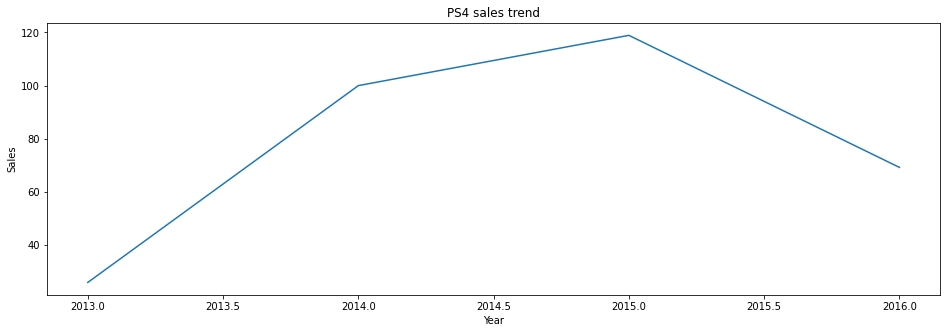

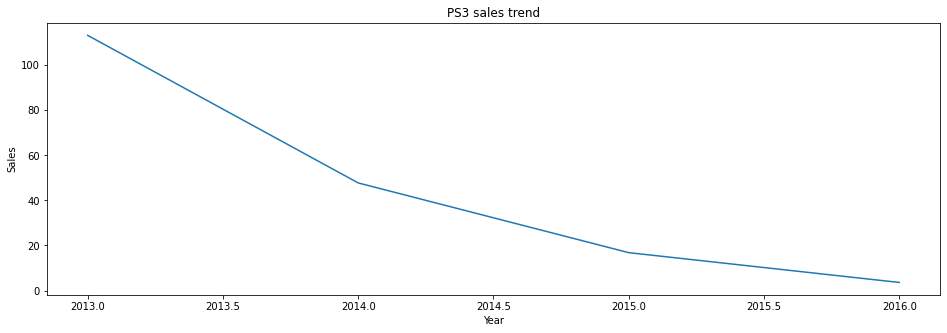

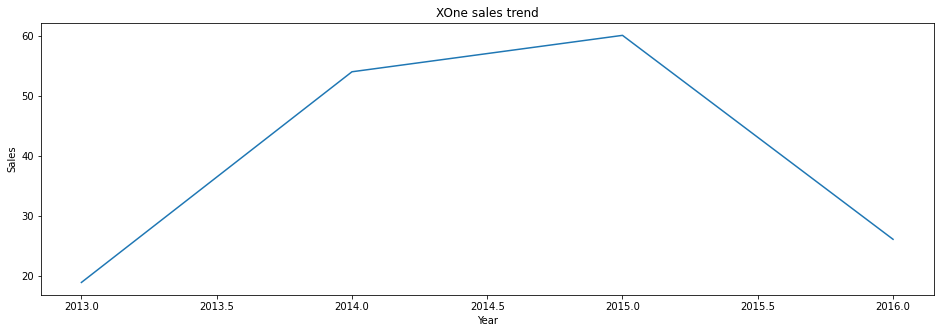

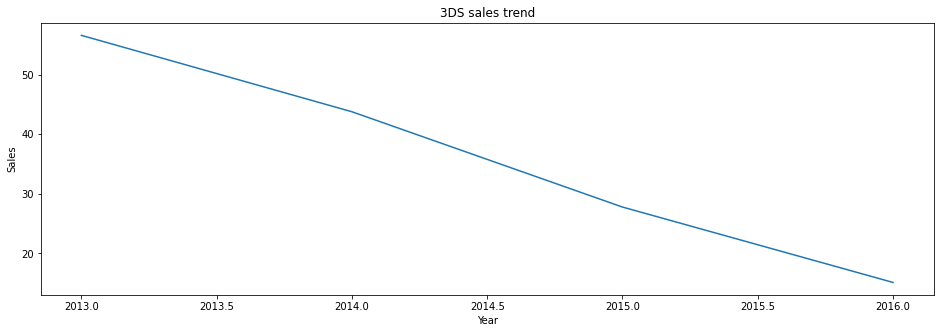

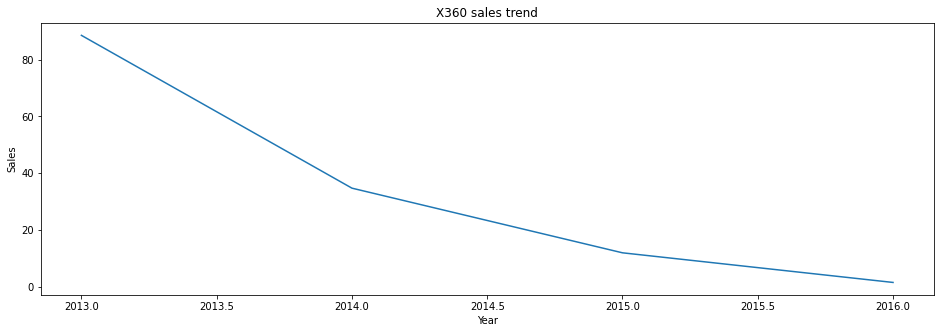

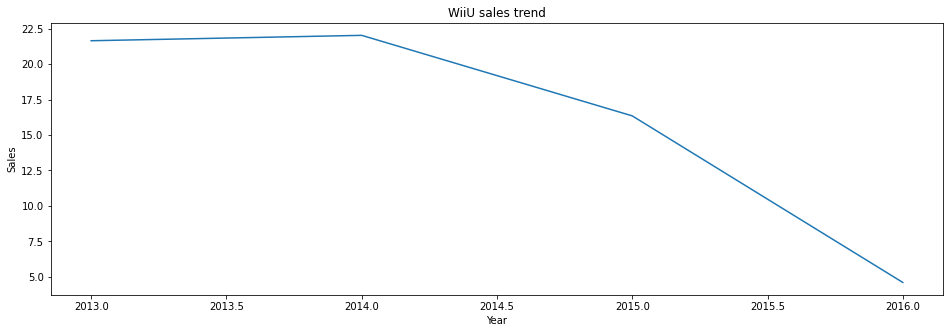

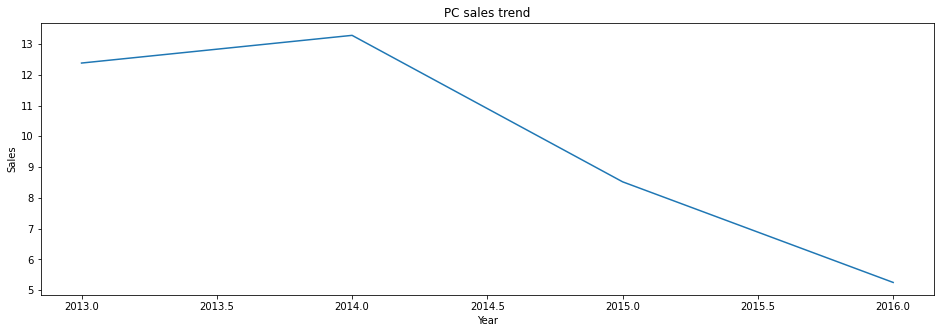

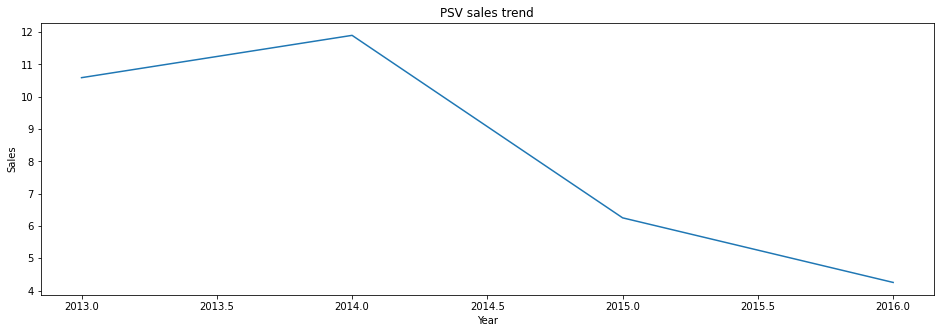

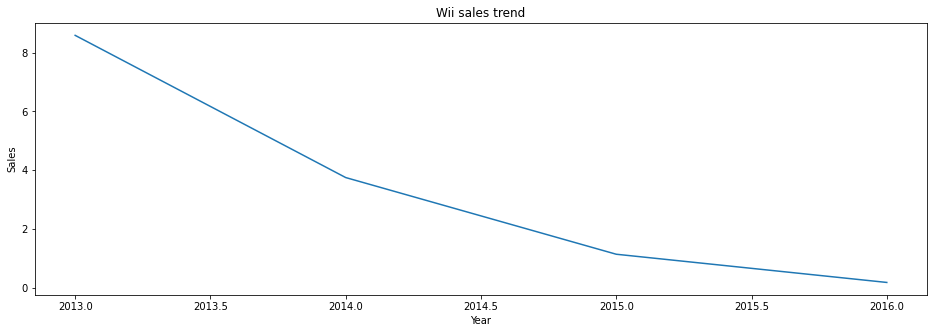

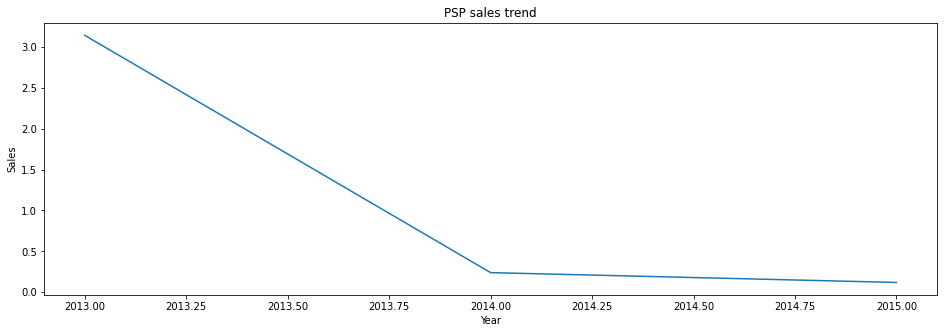

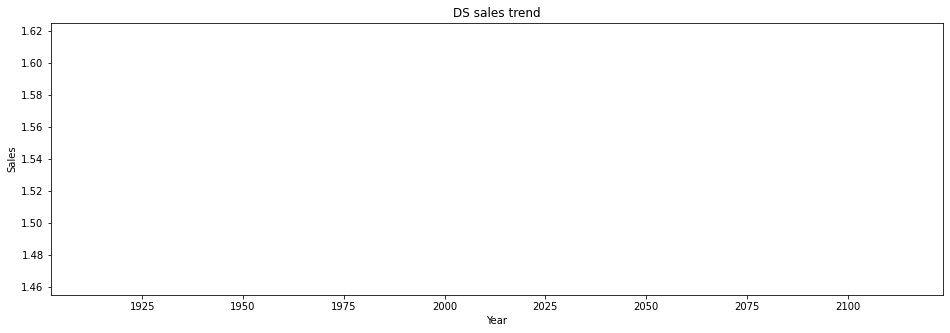

In [45]:
for platform in relevant_platform_rank.index: #loops through the platforms in relev_platform_rank
    
    p_slice = relevant_data.query('platform == @platform')
    # Create a slice of rows from relev_data where the platform matches the current platform value
    
    sales_by_year = p_slice.groupby('year_of_release')['total_sales'].sum()
    # Group the slice by year of release and fetch the sum of total sales for each year
    
    # Plot a trend plot
    sales_by_year.plot(figsize=(16, 5))
    
    # Title the chart
    plt.title('{} sales trend'.format(platform))
    
    # Label the x-axis
    plt.xlabel('Year')
    
    # Label the y-axis
    plt.ylabel('Sales')
    
    # Show the chart
    plt.show()
    
    # Print an empty line
    print('')

- Shrinking platforms include Xbox 360, PS3, Wii, DS, PS2, 3DS, PSP, PC, Wii U, and PSV.
- Growing platforms are PS4 and Xbox One.
- The smaller bins for 2016 may be due to the data collection ending before the year concluded.
- PS4 and Xbox One are still in the early stages of their lifespan, suggesting potential for increased profits in the next 2-3 years.
- Other platforms (GC,XB,GBA,DC) were already declining before 2016.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2c704dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2c70382e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2c704d880>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa2c70389a0>,
 'fliers': [],
 'means': []}

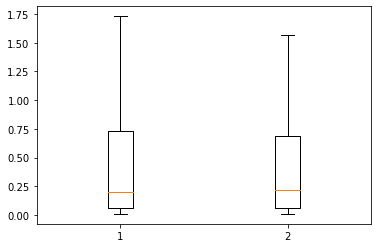

In [46]:
ps4_data = games.query('platform == "PS4"')
xone_data = games.query('platform == "XOne"')

plt.boxplot([ps4_data['total_sales'], xone_data['total_sales']], showfliers=False)

In this comparison of data between the PS4 and Xbox One for the year 2016, we observe a similarity in the distribution of total sales for each game. The PS4 however has significantly more outliers, some with much higher total sales than the outliers from the Xbox One console. The whiskers for PS4 extend higher compared to Xbox One. Despite these differences, the interquartile ranges (IQRs) and medians for both platforms are approximately equal. Based on these distributions, releasing a game on the PS4 doesn't appear to be a disadvantageous choice.

<a id="15"></a> 
## Comparing sales of games across potentially profitable platforms

- The platforms with potential for profitability are those that demonstrated strong sales performance in 2016 and are likely to continue generating sales in 2017. These platforms include Xbox One, PS4, PC, 3DS, Wii U, and PSV.
- A slice will be created from relevant_data table containing rows where the platform is PS4 or Xbox One or others, and a boxplot of sales by platform will be made.

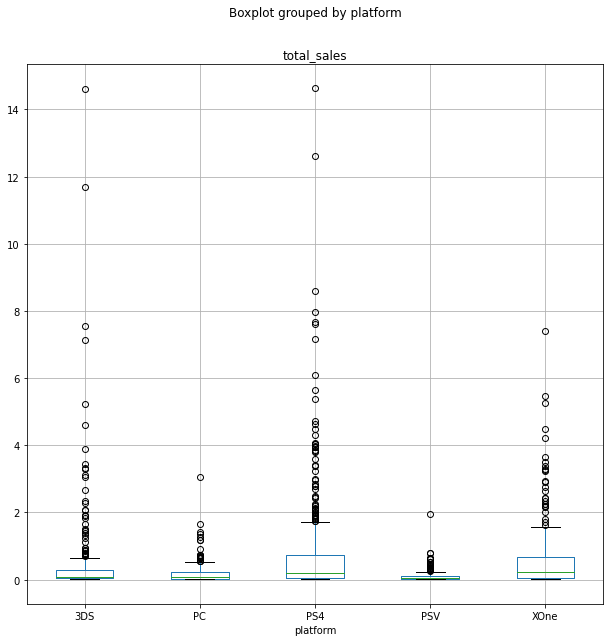

In [47]:
ptprof_platforms=relevant_data.query('platform == "XOne" | platform == "PS4" | platform == "3DS" | platform == "PC" | platform == "PSV"')
# makes a slice from relevant_data with rows where the platform is either of the potentially profitable platforms that being mentioned

ptprof_platforms.boxplot(column='total_sales', by='platform', figsize=(10, 10))
#creates a boxplot from the slice of sales by platform

plt.show() 

The median values and typical sales intervals for PS4 and Xbox One show relatively little variation. In contrast, the medians for the other platforms are notably lower, with PSV's median being the closest to zero. However, PS4 stands out with a significantly larger number of outliers compared to Xbox One, with the highest outlier reaching approximately $14.5 million in sales.

<a id="16"></a> 
## The effect of user and professional reviews on sales

- To determine the effect of user and professional reviews, we will use 3 types of platform which are PS4, XOne, 3DS as reference. Scatterplot will be used to identify the relationship between critic_scores/user_score and total_sales for different platform. 
- After that, correlation coefficient will be conducted.The coefficient ranges from 0 to 1 for positive correlation and from -1 to 0 for negative correlation. A correlation greater than 0.5 suggests a strong positive correlation, while a correlation lower than -0.5 indicates a strong negative correlation. Correlations between -0.5 and 0.5 suggest little to no correlation or a correlation that cannot be linearly expressed.

<a id="17"></a> 
### PS4 Platform

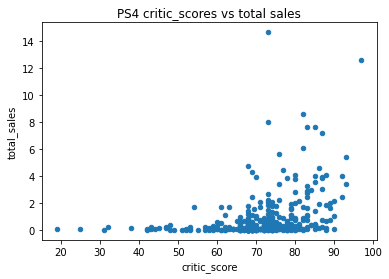

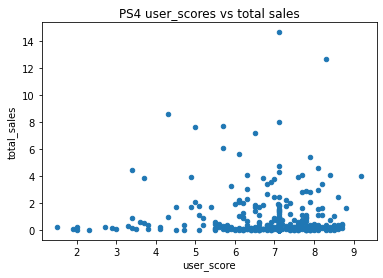

In [48]:
ps4_data = ptprof_platforms.query('platform == "PS4"')
# makes a slice of rows from ptprof_platforms where the platform is PS4

cols=['critic_score', 'user_score'] #makes an array with entries: 'critic_score' and 'user_score'

for column in cols: # loops through the entries in the array
    
    ps4_data.plot(x=column, y='total_sales', kind='scatter')
    plt.title('PS4 {}s vs total sales'.format(column))
    #plots a scatterplot for the score against total sales
    
    plt.show()

In [49]:
print(ps4_data['critic_score'].corr(ps4_data['total_sales']))
# prints the correlation coefficient for critic_score vs total_sales

print(ps4_data['user_score'].corr(ps4_data['total_sales']))
# prints the correlation for coefficient user_score vs total_sales

0.351474359259249
-0.04545391610787535


- The findings indicate that there is little to no linear correlation between user_score and critic_score with sales. This suggests that high quality does not necessarily ensure commercial success for PS4 games.

<a id="18"></a> 
### XOne Platform

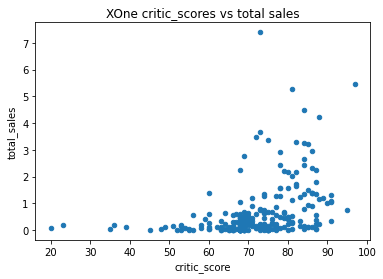

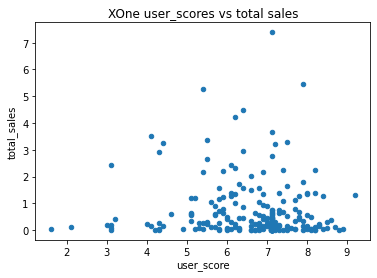

In [50]:
xone_data = ptprof_platforms.query('platform == "XOne"')
# makes a slice of rows from ptprof_platforms where the platform is XOne

cols=['critic_score', 'user_score'] #makes an array with entries: 'critic_score' and 'user_score'

for column in cols: # loops through the entries in the array
    
    xone_data.plot(x=column, y='total_sales', kind='scatter')
    plt.title('XOne {}s vs total sales'.format(column))
    #plots a scatterplot for the score against total sales
    
    plt.show()

In [51]:
print(xone_data['critic_score'].corr(xone_data['total_sales']))
# prints the correlation coefficient for critic_score vs total_sales

print(xone_data['user_score'].corr(xone_data['total_sales']))
# prints the correlation for coefficient user_score vs total_sales

0.37861650130857405
-0.08963448946492547


- Still the same conclusion as with PS4 platform. There  is little to no linear correlation between user_score and critic_score with sales.

<a id="19"></a> 
### 3DS Platform

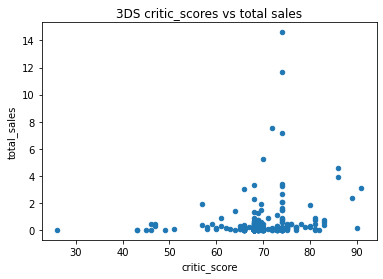

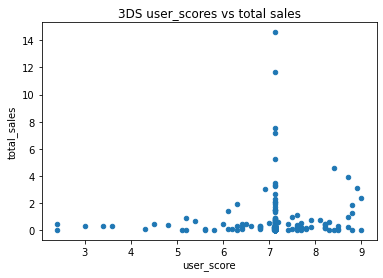

In [52]:
ds_data = ptprof_platforms.query('platform == "3DS"')
# makes a slice of rows from ptprof_platforms where the platform is 3DS

cols=['critic_score', 'user_score'] #makes an array with entries: 'critic_score' and 'user_score'

for column in cols: # loops through the entries in the array
    
    ds_data.plot(x=column, y='total_sales', kind='scatter')
    plt.title('3DS {}s vs total sales'.format(column))
    #plots a scatterplot for the score against total sales
    
    plt.show()

In [53]:
print(ds_data['critic_score'].corr(ds_data['total_sales']))
# prints the correlation coefficient for critic_score vs total_sales

print(ds_data['user_score'].corr(ds_data['total_sales']))
# prints the correlation for coefficient user_score vs total_sales

0.17847742178975187
0.07378240143519445


- There still no correlation with total sales. Based on observation on three platforms, we can deduced that critic score and user score does not have effect on total sales.

<a id="20"></a> 
### Compare the sales of same games in different platform

In addition, we also wanted to observe which platform mostly used by users for smae games. It is to determine which platform that could be focused on for more profitable game to be released in the future. Three most used platform which PS4,XOne, and 3DS will be used as references.

In [54]:
#find games on the top 3 platforms
recent_subset = relevant_data.query('platform == "PS4" | platform == "XOne" | platform == "3DS"')

# step 1 and 2
name_counts = recent_subset.name.value_counts()

# choose the same games used in top three platform 
same_game = recent_subset[recent_subset['name'].isin(name_counts.index[name_counts.gt(1)])]

# sorting of games names according to same names
same_game = same_game.sort_values('name')

same_game.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9197,7 Days to Die,PS4,2016,Action,0.04,0.08,0.00,0.02,45.0,5.90000,M,0.14
12863,7 Days to Die,XOne,2016,Action,0.03,0.02,0.00,0.00,35.0,5.20000,M,0.05
11293,Adventure Time: Finn & Jake Investigations,3DS,2015,Action,0.03,0.05,0.00,0.01,68.0,7.12633,T,0.09
10893,Adventure Time: Finn & Jake Investigations,PS4,2015,Action,0.03,0.05,0.00,0.02,68.0,7.12633,T,0.10
12920,Adventure Time: Finn & Jake Investigations,XOne,2015,Action,0.03,0.02,0.00,0.00,68.0,7.12633,T,0.05
14940,Agatha Christie's The ABC Murders,PS4,2016,Adventure,0.01,0.01,0.00,0.00,67.0,6.20000,T,0.02
16322,Agatha Christie's The ABC Murders,XOne,2016,Adventure,0.01,0.00,0.00,0.00,66.0,7.50000,E,0.01
3909,Alien: Isolation,XOne,2014,Shooter,0.22,0.24,0.00,0.04,78.0,7.80000,M,0.50
1812,Alien: Isolation,PS4,2014,Shooter,0.34,0.57,0.04,0.17,79.0,8.10000,M,1.12
7296,Angry Birds Star Wars,PS4,2013,Strategy,0.10,0.08,0.00,0.04,47.0,2.00000,E,0.22


In [55]:
#by using this, it can be seen that most games are cross console between the PS4 and Xbox One. These two platform will be compared
same_game.groupby('platform').count()

ps4_x1 = same_game[(same_game['platform']=='PS4') | (same_game['platform']=='XOne')]
ps4_x1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9197,7 Days to Die,PS4,2016,Action,0.04,0.08,0.00,0.02,45.0,5.90000,M,0.14
12863,7 Days to Die,XOne,2016,Action,0.03,0.02,0.00,0.00,35.0,5.20000,M,0.05
10893,Adventure Time: Finn & Jake Investigations,PS4,2015,Action,0.03,0.05,0.00,0.02,68.0,7.12633,T,0.10
12920,Adventure Time: Finn & Jake Investigations,XOne,2015,Action,0.03,0.02,0.00,0.00,68.0,7.12633,T,0.05
14940,Agatha Christie's The ABC Murders,PS4,2016,Adventure,0.01,0.01,0.00,0.00,67.0,6.20000,T,0.02
16322,Agatha Christie's The ABC Murders,XOne,2016,Adventure,0.01,0.00,0.00,0.00,66.0,7.50000,E,0.01
3909,Alien: Isolation,XOne,2014,Shooter,0.22,0.24,0.00,0.04,78.0,7.80000,M,0.50
1812,Alien: Isolation,PS4,2014,Shooter,0.34,0.57,0.04,0.17,79.0,8.10000,M,1.12
7296,Angry Birds Star Wars,PS4,2013,Strategy,0.10,0.08,0.00,0.04,47.0,2.00000,E,0.22
8607,Angry Birds Star Wars,XOne,2013,Strategy,0.11,0.04,0.00,0.02,53.0,6.90000,E,0.17


In [56]:
same_game_sales = ps4_x1.pivot_table(index='name',columns='platform', values = 'total_sales')

same_game_sales.head()

platform,PS4,XOne
name,,
7 Days to Die,0.14,0.05
Adventure Time: Finn & Jake Investigations,0.10,0.05
Agatha Christie's The ABC Murders,0.02,0.01
Alien: Isolation,1.12,0.50
Angry Birds Star Wars,0.22,0.17


- Based on pivot table, there are differences between games sale across XOne and PS4. After that, mean will be used to see if there are differences between the sales of games between the two platforms.

In [57]:
same_game_sales['difference'] = same_game_sales['PS4'] - same_game_sales['XOne']
# calculate difference between Xone and PS4

mean = same_game_sales['difference'].mean()
median = same_game_sales['difference'].median()
# calculate median and mean for both platform

print('The mean difference between the sales on the PS4 and the Xbox One is:', mean, "\nThe median difference between the sales on the PS4 and the Xbox is:", median)

The mean difference between the sales on the PS4 and the Xbox One is: 0.5852073732718894 
The median difference between the sales on the PS4 and the Xbox is: 0.21000000000000002


The cross-platform games available on both the PS4 and Xbox One exhibit slight differences, with those sold on the PS4 averaging approximately $585,207 more in total sales than those on the Xbox One. This data serves to affirm our decision to select the PS4 as our preferred platform.

<a id="21"></a> 
## The most profitable genres of 'Games'

To identify profitable genre, the number of genres are identified. Then, number of sales are identified. Both of these dataset plotted based on bar graph.

In [58]:
genre_count=relevant_data['genre'].value_counts().sort_values(ascending=False)
#counts appearances of each unique value in the column and sorts in descending order

genre_count

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

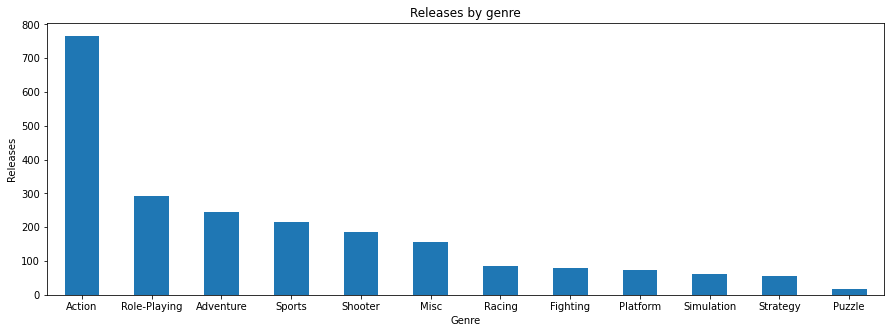

In [59]:
genre_count.plot.bar(rot=0, figsize=(15, 5))
plt.title('Releases by genre')
plt.xlabel('Genre')
plt.ylabel('Releases')
plt.show()

Action had the highest number of releases by a significant margin, with over 700 titles, while puzzle games had the fewest, totaling less than 100. Next, it will be rank based on total sales.

In [60]:
genre_profit=relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
#groups relevant_data by genre and sums the total sales for each genre sorting the values in descending order

genre_profit

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

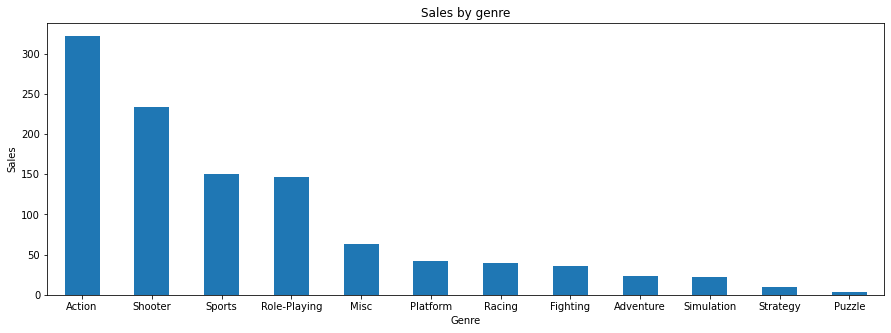

In [61]:
genre_profit.plot.bar(rot=0, figsize=(15, 5))
plt.title('Sales by genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

The most profitable genres, are action which surpassing 300 million dollars, followed by shooter and sports games. Conversely, simulation, strategy, and puzzle genres yield the lowest profits. Notably, genres with the highest sales (ranging from action to role-playing) typically demand extensive graphical development, while those with lower sales (such as racing and others) often require less graphical complexity.

<a id="22"></a> 
## User Profile for each region

The platforms (top 5), genres (top 5), and game ratings that sell most in North America, Japanese, EU will be identify.

<a id="23"></a> 
### North American User

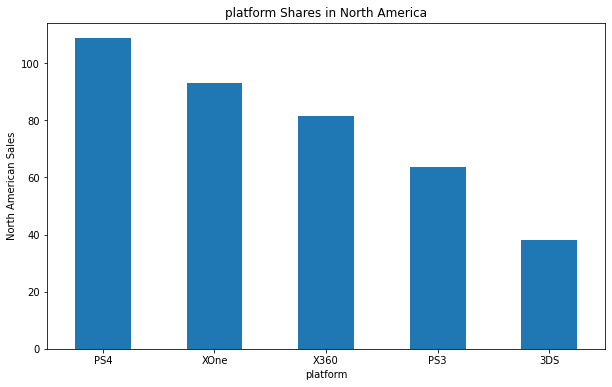

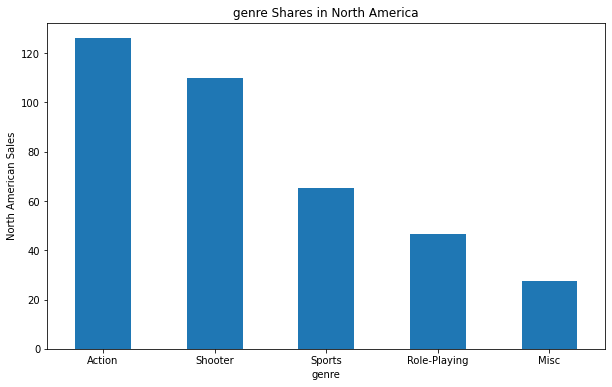

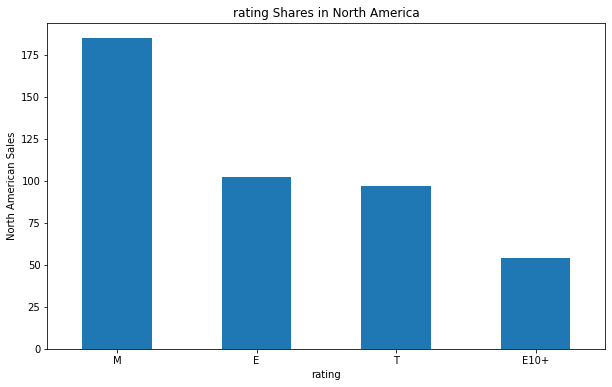

In [68]:
cols = ['platform', 'genre', 'rating']

for col in cols:
    # Group relevant_data by the present column and obtain the sum of the North American sales for each of its values, sorting them in descending order
    na_slice = relevant_data.groupby(col)['na_sales'].sum().sort_values(ascending=False)
    
    # Plotting the data using bar graphs
    na_slice.head().plot(kind='bar', figsize=(10, 6))
    
    # Add title and labels
    plt.title(f'{col} Shares in North America')
    plt.xlabel(col)
    plt.ylabel('North American Sales')
    plt.xticks(rotation=0)
    
    # Show the plot
    plt.show()
    print('')

- In the North American market, the leading platforms are PS4, XOne, X360, PS3 and 3DS with four of them being home consoles and DS being portable. 
- The top five genres are action, shooter, sports, role-playing, and miscellaneous.
- Games rated 'M' (Mature), have the highest sales, followed by 'E' (Everyone), and then 'T' (Teen), making up the top three.

<a id="24"></a> 
### Japanese User

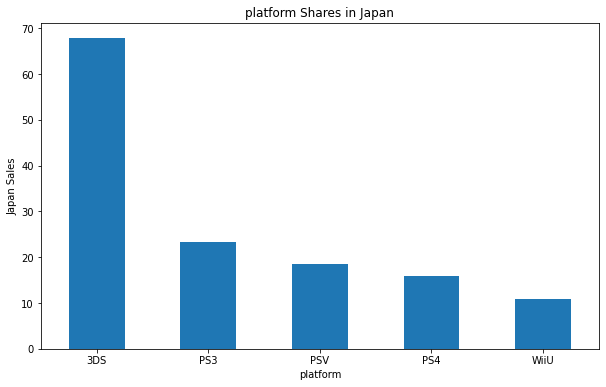

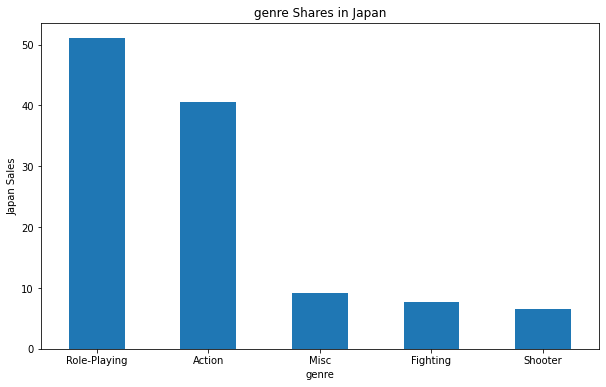

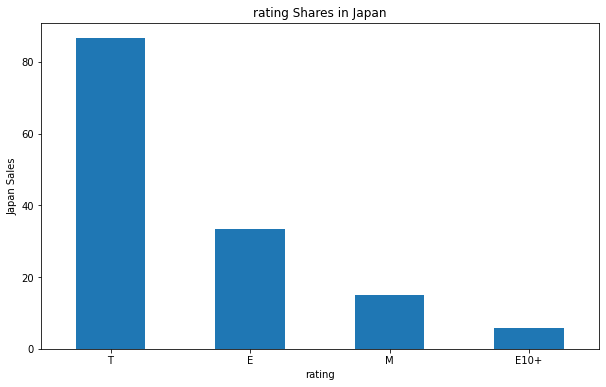

In [70]:
import matplotlib.pyplot as plt

cols = ['platform', 'genre', 'rating']

for col in cols:
    # Group relevant_data by the present column and get the sum of the JP sales for each of its values, sorting them in descending order
    jp_slice = relevant_data.groupby(col)['jp_sales'].sum().sort_values(ascending=False)
    
    # Plotting the data using bar graphs
    jp_slice.head().plot(kind='bar', figsize=(10, 6))
    
    # Add title and labels
    plt.title(f'{col} Shares in Japan')
    plt.xlabel(col)
    plt.ylabel('Japan Sales')
    plt.xticks(rotation=0)
    
    # Show the plot
    plt.show()
    print('')


- In the Japanese market, the leading platforms are 3DS, PS3, PSV, PS4 and Wiiu, with a notable preference for handheld platforms such as 3DS, and PSV, all of which are manufactured in Japan. 
- The top genres are role-playing, followed by action, miscellaneous, fighting, and shooter. 
- The highest-selling ratings are 'T', followed by 'E', and 'M'.

<a id="25"></a> 
### EU User

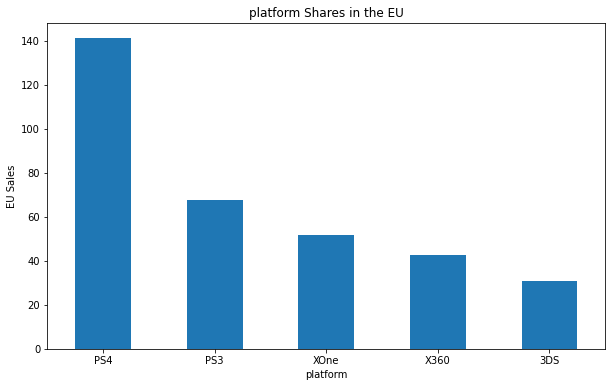

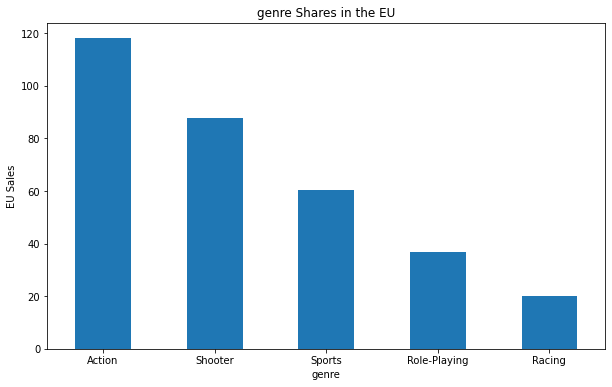

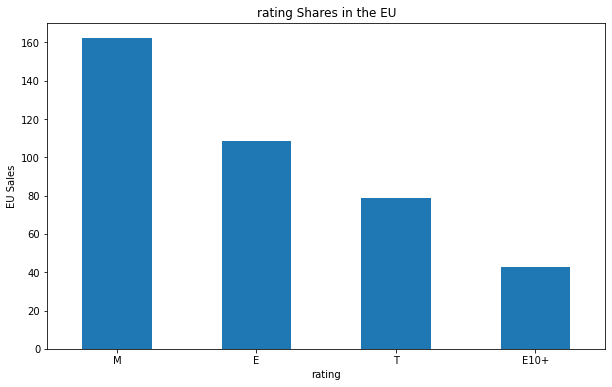

In [72]:
import matplotlib.pyplot as plt

cols = ['platform', 'genre', 'rating']

for col in cols:
    # Group relevant_data by the present column and get the sum of the EU sales for each of its values, sorting them in descending order
    eu_slice = relevant_data.groupby(col)['eu_sales'].sum().sort_values(ascending=False)
    
    # Plotting the data using bar graphs
    eu_slice.head().plot(kind='bar', figsize=(10, 6))
    
    # Add title and labels
    plt.title(f'{col} Shares in the EU')
    plt.xlabel(col)
    plt.ylabel('EU Sales')
    plt.xticks(rotation=0)
    
    # Show the plot
    plt.show()
    print('')


- In the EU market, the leading platforms are PS4,PS3, XOne, X360, and 3DS, with home consoles continuing to dominate. 
- The top genres are Action, Shooter, Sports, Role-playing, and Racing. 
- Games rated 'M' continue to have the highest sales, followed by 'E', and 'T'.

<a id="26"></a> 
## Conclusion

- Our analysis of user preferences across North America, the EU, and Japan reveals distinct trends:
- North American and EU markets exhibit a preference for home consoles, such as X360, PS3, Wii, and PS4.
- In contrast, the Japanese market favors handheld platforms, including 3DS, and PSV.
- Action, Shooter, and Sports games are popular choices in North America and the EU, while the Japanese market shows a stronger inclination towards Role-playing games, with Action and Sports games also being favored.
- Ratings preferences are consistent across regions, with North America and the EU favoring games rated 'M', followed by 'E', and 'T'. In Japan, the preference order is 'T', 'E', and then 'M'.

<a id="27"></a> 
# Stage 4: Hypothesis Testing

<a id="28"></a> 
## 4.1: Hypothesis 1: 'Average user ratings of the Xbox One and PC platforms are the same'

- Null Hypothesis: 'Average user ratings of the Xbox One and PC platforms are the same'.
- Alternate Hypothesis: 'Average user ratings of the Xbox One and PC platforms are different'.

In [73]:
xone_slice = relevant_data.query('platform == "XOne"')
#makes a slice of rows from relevant_data where the platform is xone for xbox one

xone_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    int64  
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     247 non-null    float64
 9   user_score       247 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 25.1+ KB


In [74]:
pc_slice = relevant_data.query('platform == "PC"')
#makes a slice of rows from relevant_data where the platform is pc

pc_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             189 non-null    object 
 1   platform         189 non-null    object 
 2   year_of_release  189 non-null    int64  
 3   genre            189 non-null    object 
 4   na_sales         189 non-null    float64
 5   eu_sales         189 non-null    float64
 6   jp_sales         189 non-null    float64
 7   other_sales      189 non-null    float64
 8   critic_score     189 non-null    float64
 9   user_score       189 non-null    float64
 10  rating           189 non-null    object 
 11  total_sales      189 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 19.2+ KB


- Levene's test will be implemented using the method st.levene() which will take user_score columns from both slices as arguments, and also set the parameter "center='mean'". 
- This method returns a p-value that we will compare to a threshold called the statistical significance (commonly called alpha). 
- Alpha will be set to 5%. If the p-value returned is greater than our alpha, then the variances can be considered homogeneous. - If it is lower than our alpha, then the variances cannot be considered homogeneous

In [75]:
alpha = 0.05 #sets our alpha to 5%

result = st.levene(xone_slice['user_score'], pc_slice['user_score'], center='mean')
#implements Levene's test on slice columns specifying that the variances were calculated from the mean

print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('The variances are approximately the same')
    
else:
    print('The variances are too far apart to be considered homogeneous')

p-value: 9.040376173900548e-06
The variances are too far apart to be considered homogeneous


- The p-value lower than alpha, indicating variances are too far apart for the hypothesis test.
- To assess hypothesis, st.ttest_ind() method wil be employed, which evaluates the likelihood of the means of two statistical populations (both slice columns) being equal.
- Both slice columns are provided as arguments and set 'equal_var=False' due to unhomogeneous variances indicated by Levene's test.
- The method returns a p-value for comparison with our alpha.
- If the p-value exceeds alpha, it suggests the averages are likely the same, and the null hypothesis cannot be rejected.
- Conversely, if the p-value is less than alpha, reject the null hypothesis.

In [76]:
alpha = 0.05 #sets alpha to 5%

result = st.ttest_ind(xone_slice['user_score'], pc_slice['user_score'], equal_var=False)
#implements the t-test on slice columns 

print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('Do Not Reject the null hypothesis')
else:
    print('Reject the null hypothesis')

p-value: 0.06817560404247579
Do Not Reject the null hypothesis


The p-value do exceeds our alpha threshold. As a result, we do not reject our null hypothesis. Thus, 'Average user ratings of the Xbox One and PC platforms are the same'

<a id="29"></a> 
## 4.2: Hypothesis 2: 'Average user ratings for the Action and Sports genres are different.'

- Null Hypothesis: 'Average user ratings for the Action and Sports genres are the same'
- Alternate Hypothesis: 'Average user ratings for the Action and Sports genres are different'.

In [77]:
action_slice = relevant_data.query('genre == "Action"')
action_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             766 non-null    object 
 1   platform         766 non-null    object 
 2   year_of_release  766 non-null    int64  
 3   genre            766 non-null    object 
 4   na_sales         766 non-null    float64
 5   eu_sales         766 non-null    float64
 6   jp_sales         766 non-null    float64
 7   other_sales      766 non-null    float64
 8   critic_score     766 non-null    float64
 9   user_score       766 non-null    float64
 10  rating           766 non-null    object 
 11  total_sales      766 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 77.8+ KB


In [78]:
sports_slice = relevant_data.query('genre == "Sports"')
sports_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             214 non-null    object 
 1   platform         214 non-null    object 
 2   year_of_release  214 non-null    int64  
 3   genre            214 non-null    object 
 4   na_sales         214 non-null    float64
 5   eu_sales         214 non-null    float64
 6   jp_sales         214 non-null    float64
 7   other_sales      214 non-null    float64
 8   critic_score     214 non-null    float64
 9   user_score       214 non-null    float64
 10  rating           214 non-null    object 
 11  total_sales      214 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 21.7+ KB


In [79]:
alpha = 0.05 #sets our alpha to 5%

result = st.levene(action_slice['user_score'], sports_slice['user_score'], center='mean')
#implements Levene's test on slice columns specifying that the variances were calculated from the mean

print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('The variances are approximately the same')
    
else:
    print('The variances are too far apart to be considered homogeneous')

p-value: 1.1446195266672319e-39
The variances are too far apart to be considered homogeneous


- Given that the p-value is lower than our alpha threshold, the variances cannot be considered to be homogeneous in this scenario. 
- Therefore, when utilizing the st.ttest_ind() method to examine the equality of averages, the parameter will be specified to 'equal_var=False'.

In [80]:
alpha = 0.05 #sets alpha to 5%

result = st.ttest_ind(action_slice['user_score'], sports_slice['user_score'], equal_var=False)
#implements the t-test on slice columns 

print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('Do Not Reject the null hypothesis')
else:
    print('Reject the null hypothesis')

p-value: 1.4084155169856942e-20
Reject the null hypothesis


The p-value do not exceeds our alpha threshold. As a result, we reject our null hypothesis. Thus, 'Average user ratings for the Action and Sports genres are different'.

<a id="30"></a> 
# Stage 5: General conclusion 

From the data we gathered and analyzed, we concluded that various factors play significant roles in determining the success of a game. The popularity of a developed game can vary greatly depending on numerous variables such as genre, console, and country of release. Surprisingly, even the ESRB rating has the potential to influence a game's popularity across different countries!

- Missing values were filled in, and analyses were conducted to determine the most profitable genres, ratings, and platforms.
- The correlation between critic and user scores with total sales was found to be minimal or non-existent.
- User profiles were developed for the North American, EU, and Japanese markets.
- Hypotheses were tested:
1. The hypothesis that the average user ratings of the Xbox One and PC platforms are the same could not be rejected.
2. The hypothesis that the average user ratings for the Action and Sports genres are different could be rejected.